In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

print(x_train.shape)
print(x_train[0].shape)
x_train = x_train/255.0
x_test = x_test/255.0

(60000, 28, 28)
(28, 28)


In [6]:
model = Sequential()
model.add(LSTM(128, input_shape = (x_train.shape[1:]), activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 3, validation_data=(x_test,y_test))



Epoch 1/3
1875/1875 [==============================] - 101s 53ms/step - loss: 1.0621 - accuracy: 0.6355 - val_loss: 0.1325 - val_accuracy: 0.9600
Epoch 2/3
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1897 - accuracy: 0.9491 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 3/3
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1204 - accuracy: 0.9679 - val_loss: 0.1200 - val_accuracy: 0.9656


In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
model.save('rnn_num_reader.model')
new_model = tf.keras.models.load_model('rnn_num_reader.model')

INFO:tensorflow:Assets written to: rnn_num_reader.model\assets


In [15]:
predictions = new_model.predict([x_test])


[1.06252392e-05 3.60686332e-04 9.99371469e-01 5.02331250e-06
 4.94715241e-05 3.77703395e-06 1.60206604e-04 1.02586255e-05
 2.84058297e-05 1.45950395e-07]
2


In [23]:
i = 5
print(predictions[i])
print(np.argmax(predictions[i]))

[2.4769136e-08 9.9973172e-01 1.8512593e-06 1.4270235e-05 1.0706428e-05
 4.7607269e-08 1.2258906e-07 1.9041085e-04 4.5451769e-05 5.3971066e-06]
1


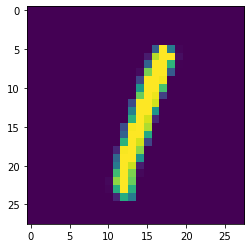

In [24]:
plt.imshow(x_test[i])
plt.show()